In [1]:
!python .\run.py .\interactor\windows\interactor.exe .\data\sample_practice.in "python ./demos/python/main.py" -d -r 999

^C


In [1]:
import re

with open("data/sample_practice.in") as f:
    s = f.read()

lines = s.split("TIMESTAMP")
timestamps = []

for line in lines[1:]:
    timestamps.append(line.split("\n")[1:])

In [2]:
object_dict = {
    0: [0, 0],  # id: [size, tag]
}

write_objects = []
delete_objects = []
read_objects = []

In [3]:
delete_objects, write_objects, read_objects = [], [], []

for i in range(0, len(timestamps)):
    timestamp = timestamps[i]
    index = 0
    delete_cmd, write_cmd, read_cmd = [], [], []
    
    delete_num = int(timestamp[0])
    for i in range(index+1, index+1+delete_num):
        delete_cmd.append(timestamp[i])
    
    index += delete_num + 1
    write_num = int(timestamp[index])
    for i in range(index+1, index+1+write_num):
        write_cmd.append(timestamp[i])

    index += write_num + 1
    read_num = int(timestamp[index])
    for i in range(index+1, index+1+read_num):
        read_cmd.append(timestamp[i])
    
    timestamp_delete = []
    for cmd in delete_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        obj_id = int(res[0])
        timestamp_delete.append(obj_id)
    delete_objects.append(timestamp_delete)
    
    timestamp_write = []
    for cmd in write_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        obj_id = int(res[0])
        obj_size = int(res[1])
        obj_tag = int(res[2])

        object_dict[obj_id] = [obj_size, obj_tag]
        timestamp_write.append([obj_size, obj_tag])
    write_objects.append(timestamp_write)
        
    timestamp_read = []
    for cmd in read_cmd:
        if not cmd:
            continue
        res = cmd.split(" ")
        res = [_ for _ in res if _]
        requist_id = int(res[0])
        obj_id = int(res[1])

        timestamp_read.append([obj_id, requist_id])
    read_objects.append(timestamp_read)

In [4]:
def log(string):
    import time
    
    time_str = time.strftime("%H:%M:%S", time.localtime())
    with open("log.log", "a+") as f:
        f.write(f"{time_str}:  {string} \n")

In [5]:
perfect_cost = [0 for i in range(16+1)]
max_perfect_cost = [0 for i in range(16+1)]
timestamp_cost = 0

for i in range(86400):
    for obj_id in delete_objects[i]:
        if obj_id:
            tag = object_dict[obj_id][1]
            size = object_dict[obj_id][0]
            perfect_cost[tag] -= size
    
    for obj_id in write_objects[i]:
        if obj_id:
            tag = object_dict[obj_id][1]
            size = object_dict[obj_id][0]
            perfect_cost[tag] += size
    
    for i in range(16+1):
        max_perfect_cost[i] = max(max_perfect_cost[i], perfect_cost[i])
    
    timestamp_cost = max(timestamp_cost, sum(perfect_cost))


TypeError: unhashable type: 'list'

In [ ]:
log(timestamp_cost * 3)
log(max_perfect_cost, sum(max_perfect_cost))
log(5792 * 10)

In [5]:
with open("data/sample_practice.in", "r") as f:
    s = f.readlines()[0:50]

read_count = s[33:49]
write_count = s[17:33]
delete_count = s[1:17]

In [6]:
read_count[0]

'   476    367    257    165     93    176    285    428    421    606    465    377    331    161    111    116    198    317   8067  71906 114515 106530  59697  33172  46479  57658  64951  70291  72796  69675  64229  55654  44766  31469  16690   2874    110   6307  28861  47472  61750  69091  68326  61130  45982  25795  11587   8244\n'

In [7]:
delete_freq = [[] for _ in range(16)]

for i, count in enumerate(delete_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        delete_freq[i].append(int(_))
        
write_freq = [[] for _ in range(16)]

for i, count in enumerate(write_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        write_freq[i].append(int(_))
        
read_freq = [[] for _ in range(16)]

for i, count in enumerate(read_count):
    freq = [_ for _ in count.split(' ') if _]
    for _ in freq:
        read_freq[i].append(int(_))

for i in range(len(read_count)):
    delete_count[i] = [int(_) for _ in delete_count[i].split()]
    write_count[i] = [int(_) for _ in write_count[i].split()]
    read_count[i] = [int(_) for _ in read_count[i].split()]

In [8]:
delete_count_all = [0 for i in range(16+1)]
write_count_all = [0 for i in range(16+1)]

for i in range(16):
    delete_count_all[i] = sum(delete_freq[i])
    write_count_all[i] = sum(write_freq[i])
log(delete_count_all)
print(write_count_all)

[2136, 1048, 2276, 1996, 1208, 799, 2048, 1695, 782, 1679, 923, 1876, 764, 1421, 824, 2349, 0]


<Figure size 640x480 with 0 Axes>

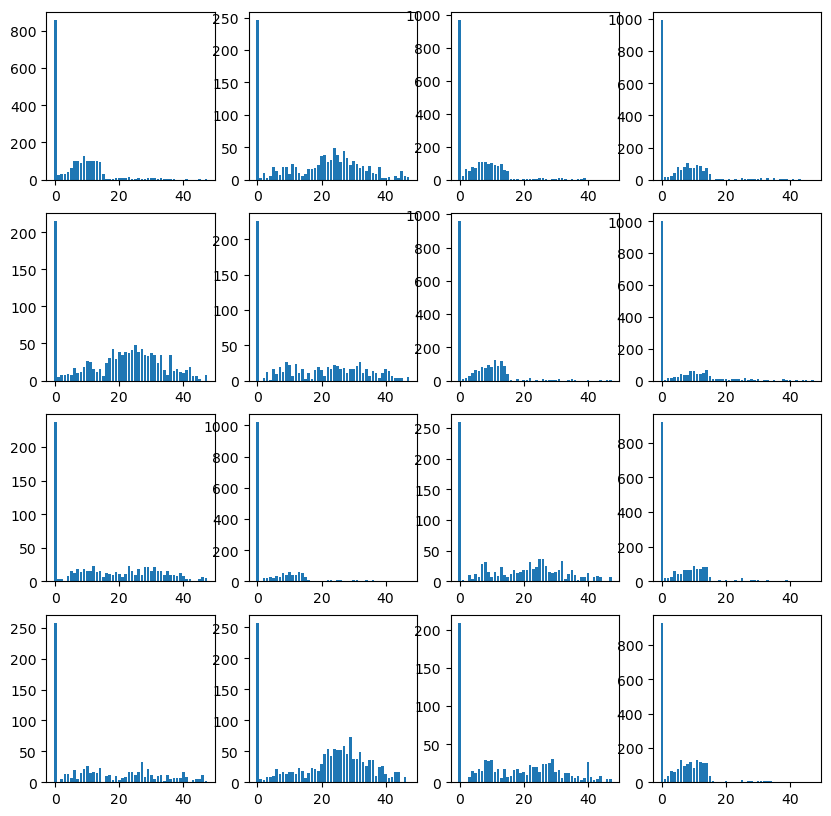

In [10]:
from matplotlib import  pyplot as plt

plt.figure(1)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.bar([_ for _ in range(len(write_freq[i]))], write_freq[i])

In [11]:
perfect_freq = [0 for _ in range(16+1)]
timestamp_cost = 0


max_perfect_freq = [0 for _ in range(16+1)]
for i in range(len(write_count[0])):
    for j in range(len(write_count)):
        perfect_freq[j] += write_count[j][i] - delete_count[j][i]
        max_perfect_freq[j] = max(max_perfect_freq[j], perfect_freq[j])
    timestamp_cost = max(sum(perfect_freq), timestamp_cost)
    

print(perfect_freq)
print(max_perfect_freq)
print(sum(max_perfect_freq) * 3)

[1067, 799, 1585, 836, 944, 502, 1399, 783, 494, 712, 631, 1138, 434, 1107, 545, 1489, 0]
[1968, 799, 2121, 1849, 944, 524, 1933, 1507, 494, 1540, 631, 1715, 436, 1110, 545, 2196, 0]
60936


In [ ]:
read_cost, write_cost, delete_cost = 0, 0, 0
for i, freq in enumerate(read_freq):
    read_cost += sum(freq)

for i, freq in enumerate(write_freq):
    write_cost += sum(freq)

for i, freq in enumerate(delete_freq):
    delete_cost += sum(freq)

print(5792 * 10)
print(read_cost, write_cost * 3, delete_cost * 3)

<BarContainer object of 16 artists>

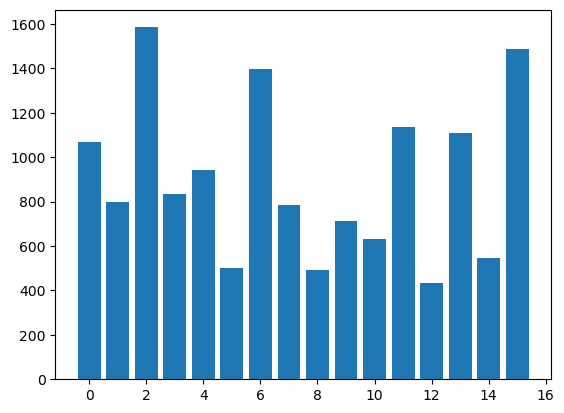

In [12]:
from matplotlib import  pyplot as plt

plt.figure(1)
write_disturbution = [sum(freq) - sum(delete_freq[i]) for i, freq in enumerate(write_freq)]

plt.bar([i for i in range(len(write_disturbution))], write_disturbution)

In [ ]:
write_disturbution

<Figure size 640x480 with 0 Axes>

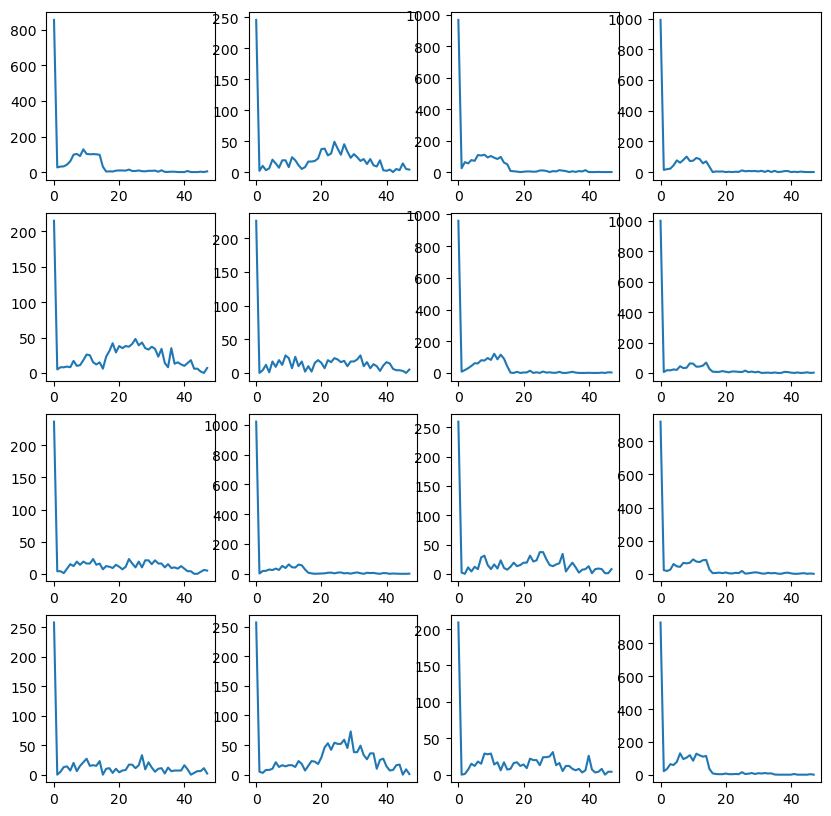

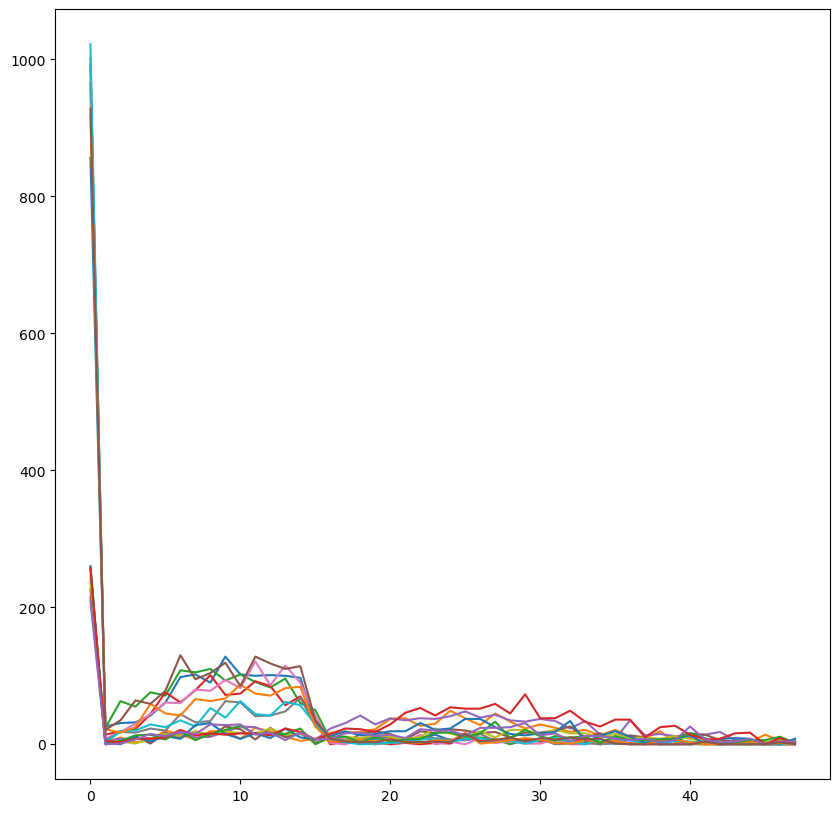

In [14]:
# plot by size in timestamp

from matplotlib import pyplot as plt

plt.figure(1)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(write_freq[i])
    
plt.figure(2)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.plot(write_freq[i])
    
plt.show()

In [3]:
import itertools
import time
from typing import List, Dict, Tuple, Optional

class HardDisk:
    def __init__(self, disk_id: int, capacity: int):
        self.id = disk_id
        self.capacity = capacity
        self.used = []    # List of (start, end, label)
        self.free = [(0, capacity)]  # List of (start, end)
    
    def allocate_space(self, size: int, label: int) -> Optional[Tuple[int, int]]:
        """使用首次适应算法分配空间，返回分配区间"""
        for i, (start, end) in enumerate(self.free):
            if end - start >= size:
                allocated = (start, start + size)
                self.used.append((allocated[0], allocated[1], label))
                self.used.sort()  # 保持有序以便后续操作
                # 更新空闲列表
                new_free = []
                if start != allocated[0]:
                    new_free.append((start, allocated[0]))
                if end != allocated[1]:
                    new_free.append((allocated[1], end))
                self.free = self.free[:i] + new_free + self.free[i+1:]
                self.free.sort()
                return allocated
        return None
    
    def release_space(self, start: int, end: int):
        """释放空间并合并相邻区块"""
        # 从已用列表中移除
        self.used = [block for block in self.used if block[0] != start or block[1] != end]
        # 加入空闲列表并合并
        self.free.append((start, end))
        self.free.sort()
        self._merge_free()
    
    def _merge_free(self):
        """合并相邻的空闲区块"""
        if not self.free:
            return
        merged = []
        current_start, current_end = self.free[0]
        for start, end in self.free[1:]:
            if start == current_end:
                current_end = end
            else:
                merged.append((current_start, current_end))
                current_start, current_end = start, end
        merged.append((current_start, current_end))
        self.free = merged
    
    def remaining_space(self):
        return sum(end - start for start, end in self.free)

class ObjectManager:
    def __init__(self, disk_count=10, disk_size=5792):
        self.disks = [HardDisk(i, disk_size) for i in range(disk_count)]
        self.label_preference = {}  # {label: [优先的磁盘列表]}
        self.object_map = {}        # {obj_id: [(disk_id, start, end)]}
        self.label_max_size = {}    # 从输入数据加载
    
    def set_label_sizes(self, max_sizes: List[int]):
        """设置标签的最大大小"""
        for label, size in enumerate(max_sizes):
            self.label_max_size[label] = size
    
    def allocate_object(self, obj_id: int, label: int, size: int) -> bool:
        start_time = time.time()
        # 优先尝试完整分配
        if self._try_allocate(obj_id, label, size):
            return True
        
        # 超时后尝试拆分
        while time.time() - start_time < 5:
            if self._try_allocate(obj_id, label, size):
                return True
        print(f"Timeout, splitting object {obj_id}")
        return self._split_and_allocate(obj_id, label, size)
    
    def _try_allocate(self, obj_id: int, label: int, size: int) -> bool:
        # 获取候选磁盘（优先同标签历史磁盘）
        preferred_disks = self.label_preference.get(label, [])
        all_disks = preferred_disks + [d.id for d in self.disks if d.id not in preferred_disks]
        
        # 寻找三个可用磁盘组合
        for disks in itertools.permutations(all_disks, 3):
            if self._allocate_on_disks(obj_id, label, size, disks):
                # 更新标签偏好
                if label not in self.label_preference:
                    self.label_preference[label] = []
                for d in disks:
                    if d not in self.label_preference[label]:
                        self.label_preference[label].append(d)
                return True
        return False
    
    def _allocate_on_disks(self, obj_id: int, label: int, size: int, disks: List[int]) -> bool:
        allocations = []
        try:
            for disk_id in disks:
                disk = self.disks[disk_id]
                allocated = disk.allocate_space(size, label)
                if not allocated:
                    # 回滚已分配的空间
                    for d, (s, e) in allocations:
                        d.release_space(s, e)
                    return False
                allocations.append((disk, allocated[0], allocated[1]))
            
            # 记录分配结果
            self.object_map[obj_id] = [
                (disk.id, start, end) for disk, start, end in allocations
            ]
            return True
        except:
            return False
    
    def _split_and_allocate(self, obj_id: int, label: int, size: int) -> bool:
        split_size = size // 2
        if split_size < 100:  # 最小拆分单位
            return False
        
        # 递归尝试拆分分配
        if self._try_allocate(obj_id, label, split_size):
            remaining = size - split_size
            return self.allocate_object(f"{obj_id}_part2", label, remaining)
        return False
    
    def delete_object(self, obj_id: int) -> List[Tuple[int, int, int]]:
        if obj_id not in self.object_map:
            return []
        
        deleted = []
        for disk_id, start, end in self.object_map[obj_id]:
            disk = self.disks[disk_id]
            disk.release_space(start, end)
            deleted.append((disk_id, start, end))
        
        del self.object_map[obj_id]
        return deleted
    
    def print_status(self):
        """打印当前磁盘状态"""
        for disk in self.disks:
            print(f"Disk {disk.id}:")
            print(f"  Used: {disk.used}")
            print(f"  Free: {disk.free}")
            print(f"  Remaining: {disk.remaining_space()}/{disk.capacity}")
            print("-" * 30)




In [9]:
len(write_objects)

86505

In [ ]:
# 测试用例
if __name__ == "__main__":
    # 初始化参数
    label_sizes = [1067, 799, 1585, 836, 944, 502, 1399, 783, 494, 712, 631, 1138, 434, 1107, 545, 1489]
    max_sizes = [1968, 799, 2121, 1849, 944, 524, 1933, 1507, 494, 1540, 631, 1715, 436, 1110, 545, 2196]
    
    manager = ObjectManager()
    manager.set_label_sizes(max_sizes)
    
    write_obj_id = 0
    for i in range(len(write_objects)):
        for id in delete_objects[i]:
                deleted = manager.delete_object(id)
                print(f"\nDeleted obj1 from: {deleted}")
                manager.print_status()
        
        for size, label in write_objects[i]:
            write_obj_id += 1
            success = manager.allocate_object(write_obj_id, label, size)
            print(f"Allocated obj{obj_id}: {'Success' if success else 'Failed'}")
    

    

Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
Allocated obj6243: Success
A